# Assignment 1: Data Exploration and Analysis
## Brett Hallum, Solomon Ndungu, and Mridul Jain

### Selected Data Set
The data set that we chose is a set of data containing loan information found on Kaggle.com. The data contains loan information for all loans issued from 2007 to 2015 from Lending Club. This leads to a set of about 880,000 data points for us to analyze. There are over 70 different attributes contained in the data set for each of these loans. The full data set can be found at https://www.kaggle.com/wendykan/lending-club-loan-data/version/1.

The goal of this data set is to analyze the payment status of loans and see if this value can be predicted from other attributes of the data set. We also want to see if a person's grade, which describes the level of interest rate a person is eligible for, can be obtained through analysis of the data.

The goodness of our analysis would be based on how well we are able to predict someone's grade to determine their interest rate and subsequently whether they will go into default on the loan or pay it off in full. Using this data effectively can help banks make better and more informed decisions in who they give loans to and what they charge them in interest if they deem them a higher risk. They can also observe loans that are currently active and determine which loans are at risk of default. Once identifying these loans, the bank can take action to contact the loan owners and attempt to minimize their risk.

### Understanding the Data
From the 74 attributes that are originally in the dataset, we parsed out many of them and ended up with a set containing 26 attributes. We parsed out columns on several criteria:
- There was insufficient data counts (Missing more than 60% of the data)
- There was only a single value for the full data set
- The column was one that was caculated from other columns, but did not provide additional insight
- There was minimal distribution of values in the data set (i.e. only 10 of one response with all the rest being another)

We did leave in description of the loan for the time being in case we wanted to do text mining on that attribute in the future on a subset of the data.

Of the remaining data, some of the more important features are listed below:
- Loan Amount: The amount the loan was taken out for - Int, Continuous
- Term: The length of time the loan will last (36 or 60 months) - Object, Nominal
- Interest Rate: Rate at which the loan is taken out for - Float, Continuous
- Grade: A letter grade representing how likely a person is to get a better interest rate. Grades of A tend to have lower (better) interest rates than those with an E or F grade - Object, Ordinal
- Employ Length: The length of time a person has been employed - Object, Ordinal
- Annual Income: The annual income of the person applying for the loan - Float, Continuous
- State: The state in which the member resides - Object, Nominal
- Purpose: The purpose for which the loan was taken out - Object, Nominal
- Loan Status: The current (at time of publication) status of the loan - Object, Nominal

A full list of the features will be displayed in a future cell after some imputation and attribute removal.

After removing the undesirable columns, we were left with data that was mostly filled in. We had some cases where up to 100 data points were missing for a given attribute. For each of these, we imputed the data with the median to ensure that did not change the distribution of the data to an extreme. In some cases, the attributes that were listed as Objects were altered to be easier to analyse. Some of them were given Ordinal values to rank them in a specific order, such as the letter grade, while others were grouped Nominally to better show the outcome, such as Loan Status.


In [67]:
import os
os.getcwd()

'C:\\Users\\Halltrino\\Desktop\\MDS Downloads\\Data Mining\\Project 1'

In [85]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.style.use('ggplot')

import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

from pandas.tools.plotting import scatter_matrix

#Bring in data set
loan_df = pd.read_csv('LoanData/loanData.csv')

In [69]:
#Remove unwanted attributes from the data set based on specific criteria
for col in ['id','funded_amnt_inv','sub_grade','emp_title','pymnt_plan','url','title','zip_code','earliest_cr_line',
            'mths_since_last_delinq','mths_since_last_record','pub_rec','revol_bal','revol_util','total_acc',
            'initial_list_status','out_prncp_inv','total_pymnt_inv','recoveries','collection_recovery_fee','last_pymnt_d',
            'last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','policy_code','application_type',
            'annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m','open_il_24m',
            'mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util',
            'total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m', 'installment', 'mths_since_last_major_derog']:
    if col in loan_df:
        del loan_df[col]

In [70]:
#Modify term to be integer for easier analysis
loan_df = loan_df.replace(to_replace=" 36 months", value=36)
loan_df = loan_df.replace(to_replace=" 60 months", value=60)

#Impute missing data values with median
for col in ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'acc_now_delinq']:
    df_temp = copy.deepcopy(loan_df[col])
    df_temp = df_temp.replace(to_replace=np.nan, value=df_temp.median())
    loan_df[col] = df_temp

There were 3 fields we did not impute in our final set of attributes. The description field, which was left in for possible future text mining, can not be imputed due to the nature of the data. The descriptions are personal notes by the borrower on why they are taking out the loan and so we did not make assumptions on what the personal reason for the loan was when we already have some of the information in the purpose field. We also left total collection amounts and total current balance of all accounts as they were. This data would be hard to impute with the information given in this set. The total collection amounts is the total amount ever owed. For the rows without this field, it was not possible to determine if the listed loan was just a single one or part of a greater list. This is true for the total current balance as well. The data points missing these data points are still valuable to use for other ananlysis, however, so they were not removed from the set.

In [71]:
#Create new variables for classification
#Nominal classification of loan_status
loan_df.loc[loan_df['loan_status'] == 'Charged Off' , 'Loan_Class'] = "Bad"
loan_df.loc[loan_df['loan_status'] == 'Default' , 'Loan_Class'] = "Bad"
loan_df.loc[loan_df['loan_status'] == 'Late (31-120 days)' , 'Loan_Class'] = "Bad"
loan_df.loc[loan_df['loan_status'] == 'Late (16-30 days)' , 'Loan_Class'] = "Bad"
loan_df.loc[loan_df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off' , 'Loan_Class'] = "Bad"

loan_df.loc[loan_df['loan_status'] == 'Fully Paid' , 'Loan_Class'] = "Good"
loan_df.loc[loan_df['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid' , 'Loan_Class'] = "Good"

loan_df.loc[loan_df['loan_status'] == 'Current' , 'Loan_Class'] = "Current"
loan_df.loc[loan_df['loan_status'] == 'In Grace Period' , 'Loan_Class'] = "Current"
loan_df.loc[loan_df['loan_status'] == 'Issued' , 'Loan_Class'] = "Current"

#Numerical classification of grade
loan_df.loc[loan_df['grade'] == 'A', 'Grade_Class'] = 1
loan_df.loc[loan_df['grade'] == 'B', 'Grade_Class'] = 2
loan_df.loc[loan_df['grade'] == 'C', 'Grade_Class'] = 3
loan_df.loc[loan_df['grade'] == 'D', 'Grade_Class'] = 4
loan_df.loc[loan_df['grade'] == 'E', 'Grade_Class'] = 5
loan_df.loc[loan_df['grade'] == 'F', 'Grade_Class'] = 6
loan_df.loc[loan_df['grade'] == 'G', 'Grade_Class'] = 7

#Numerical classification of employment length
loan_df.loc[loan_df['emp_length'] == '< 1 year', 'Emp_Class'] = 0
loan_df.loc[loan_df['emp_length'] == '1 year', 'Emp_Class'] = 1
loan_df.loc[loan_df['emp_length'] == '2 years', 'Emp_Class'] = 2
loan_df.loc[loan_df['emp_length'] == '3 years', 'Emp_Class'] = 3
loan_df.loc[loan_df['emp_length'] == '4 years', 'Emp_Class'] = 4
loan_df.loc[loan_df['emp_length'] == '5 years', 'Emp_Class'] = 5
loan_df.loc[loan_df['emp_length'] == '6 years', 'Emp_Class'] = 6
loan_df.loc[loan_df['emp_length'] == '7 years', 'Emp_Class'] = 7
loan_df.loc[loan_df['emp_length'] == '8 years', 'Emp_Class'] = 8
loan_df.loc[loan_df['emp_length'] == '9 years', 'Emp_Class'] = 9
loan_df.loc[loan_df['emp_length'] == '10+ years', 'Emp_Class'] = 10
loan_df.loc[loan_df['emp_length'] == 'n/a', 'Emp_Class'] = 0

#Range of interest rates
loan_df['Int_Rate_Range'] = pd.cut(loan_df.int_rate, [0, 5,10,15,20,25, 30], 6, labels=['VeryLow', "Low", "Medium", "High",
                                                                                 "VeryHigh", "Expensive"])
#Description of Int_Rate_Range
print loan_df.Int_Rate_Range.describe()
print loan_df.Int_Rate_Range.value_counts()

count     887379
unique         5
top       Medium
freq      372060
Name: Int_Rate_Range, dtype: object
Medium       372060
Low          235621
High         221068
VeryHigh      52137
Expensive      6493
VeryLow           0
dtype: int64


In [72]:
categorical = ["Loan_Class", "term", "home_ownership", "verification_status", "purpose", "addr_state", "Int_Rate_Range"]

continuous = ["loan_amnt", "funded_amnt", "int_rate", "annual_inc", "dti", "total_pymnt", "total_rec_prncp", "total_rec_int",
             "total_rec_late_fee", "tot_coll_amt", "tot_cur_bal"]

ordinal = ["Grade_Class", "Emp_Class"]

loan_df[continuous] = loan_df[continuous].astype(np.float64)
loan_df[ordinal] = loan_df[ordinal].astype(np.int64)

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 31 columns):
member_id              887379 non-null int64
loan_amnt              887379 non-null float64
funded_amnt            887379 non-null float64
term                   887379 non-null int64
int_rate               887379 non-null float64
grade                  887379 non-null object
emp_length             887379 non-null object
home_ownership         887379 non-null object
annual_inc             887379 non-null float64
verification_status    887379 non-null object
issue_d                887379 non-null object
loan_status            887379 non-null object
desc                   126029 non-null object
purpose                887379 non-null object
addr_state             887379 non-null object
dti                    887379 non-null float64
delinq_2yrs            887379 non-null float64
inq_last_6mths         887379 non-null float64
open_acc               887379 non-null float64
out_prncp

In [73]:
#Stats of nominal and continous data
loan_df.describe()

,member_id,loan_amnt,funded_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,acc_now_delinq,tot_coll_amt,tot_cur_bal,Grade_Class,Emp_Class
count,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.171030e+05,8.171030e+05,887379.000000,887379.000000
mean,3.500182e+07,14755.264605,14741.877625,43.201090,13.246740,7.502754e+04,18.157039,0.314432,0.694601,11.548451,8403.124852,7558.826684,5757.706424,1754.804327,0.396692,0.004991,2.257026e+02,1.394582e+05,2.798403,5.705172
std,2.411335e+07,8435.455601,8429.897657,10.998663,4.381867,6.469816e+04,17.190626,0.862232,0.998439,5.317227,8493.450269,7871.243336,6625.441046,2095.356099,4.087825,0.077624,1.031137e+04,1.537500e+05,1.312599,3.807020
min,7.047300e+04,500.000000,500.000000,36.000000,5.320000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,1.087713e+07,8000.000000,8000.000000,36.000000,9.990000,4.500000e+04,11.910000,0.000000,0.000000,8.000000,0.000000,1914.590000,1200.570000,441.460000,0.000000,0.000000,0.000000e+00,2.985300e+04,2.000000,2.000000
50%,3.709528e+07,13000.000000,13000.000000,36.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,11.000000,6458.290000,4894.999117,3215.320000,1073.280000,0.000000,0.000000,0.000000e+00,8.055900e+04,3.000000,6.000000
75%,5.847135e+07,20000.000000,20000.000000,60.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,14.000000,13659.055000,10616.814230,8000.000000,2238.265000,0.000000,0.000000,0.000000e+00,2.082050e+05,4.000000,10.000000
max,7.354484e+07,35000.000000,35000.000000,60.000000,28.990000,9.500000e+06,9999.000000,39.000000,33.000000,90.000000,49372.860000,57777.579870,35000.030000,24205.620000,358.680000,14.000000,9.152545e+06,8.000078e+06,7.000000,10.000000


In [74]:
#look at difference between the length of the loans 36 vs. 60 month loans
termGroup = loan_df.groupby('term')
termGroup['funded_amnt'].agg([np.count_nonzero, np.mean, np.std, np.median])

,count_nonzero,mean,std,median
term,,,,
36,621125.0,12474.785993,7779.360515,10000.0
60,266254.0,20030.614282,7463.350122,19325.0


In [75]:
#look at difference between the interest rate of the loans by grade
gradeGroup = loan_df.groupby('grade')
gradeGroup['int_rate'].agg([np.count_nonzero, np.mean, np.std, np.median])

,count_nonzero,mean,std,median
grade,,,,
A,148202.0,7.243312,0.975455,7.26
B,254535.0,10.829618,1.443258,10.99
C,245860.0,13.980098,1.228535,13.99
D,139542.0,17.175814,1.242879,16.99
E,70705.0,19.897322,1.500429,19.99
F,23046.0,23.582787,1.535471,23.76
G,5489.0,25.626706,1.975726,25.83


In [76]:
#look at difference between the interest rate of the loans by loan status
statusGroup = loan_df.groupby('Loan_Class')
statusGroup['int_rate'].agg([np.count_nonzero, np.mean, np.std, np.median])

,count_nonzero,mean,std,median
Loan_Class,,,,
Bad,61176.0,15.986362,4.297696,15.61
Current,616492.0,12.963253,4.337607,12.69
Good,209711.0,13.280921,4.256955,13.11


### Data Visualization
A quick and simple summarization of some of the numerical data is shown above. However, the best way to analyze some of this data is to compare it visually. We will take a look at some of the relationships that are garnered from visual plots and see if that can tell us anything about the data set that is not initially visible by just looking at the presented statistics.

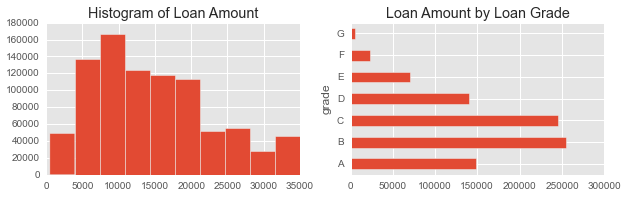

In [77]:
grouped_df = loan_df.groupby(by="grade")
plt.style.use('ggplot')

#Distirbution of the loan amount
fig = plt.figure(figsize=(20, 20))
ax2 = fig.add_subplot(2, 2, 1)
amount_hist = loan_df.funded_amnt.hist()
amount_hist.set_title('Histogram of Loan Amount')

#Visualization of loan amount by grade
ax = fig.add_subplot(2, 2, 2)
ax = grouped_df.loan_amnt.count().plot(kind='barh', figsize=(10,6))
ax.set_title('Loan Amount by Loan Grade')

The above graphs show the distribution of the values of loans. In the first graph, we see an overall distrubtion of the count of loans for a given loan amount range. For the other graph, we see a count of the number of loans taken out for each grade level. We see that there are much fewer loans taken out at the lower grade levels, and that the most frequent loans are made by people with a B or a C grade.

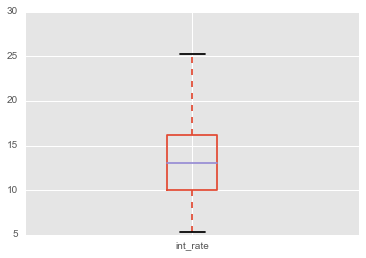

In [86]:
#Quick look at the distribution of interest rates using boxplot
ax = loan_df.boxplot(column='int_rate', figsize=(12,9))

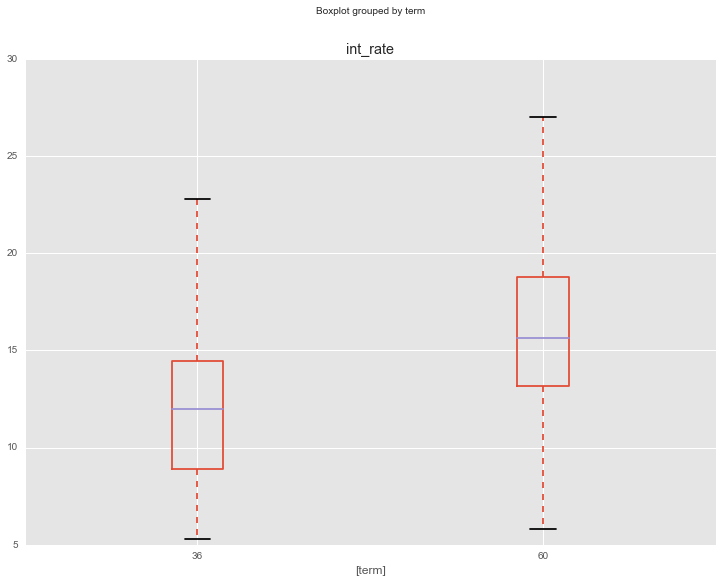

In [79]:
loan_df.boxplot(column='int_rate', by=['term'], figsize=(12,9))

A quick representation of the interest rate as divided by term. We can quickly see that shorter term loans tend to have lower interest rates with the median value being nearly 3 full percentage points lower. The following graph is a similar representation that also shows the breakdown by loan status.

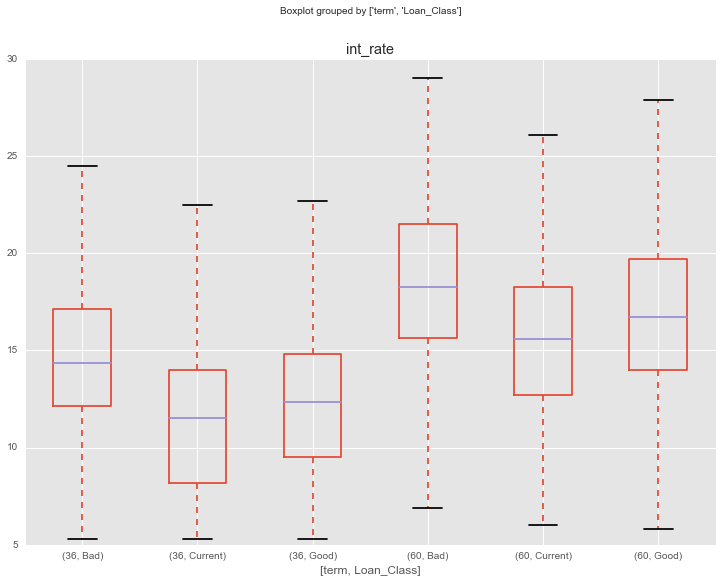

In [80]:
loan_df.boxplot(column='int_rate', by = ['term','Loan_Class'], figsize=(12,9))

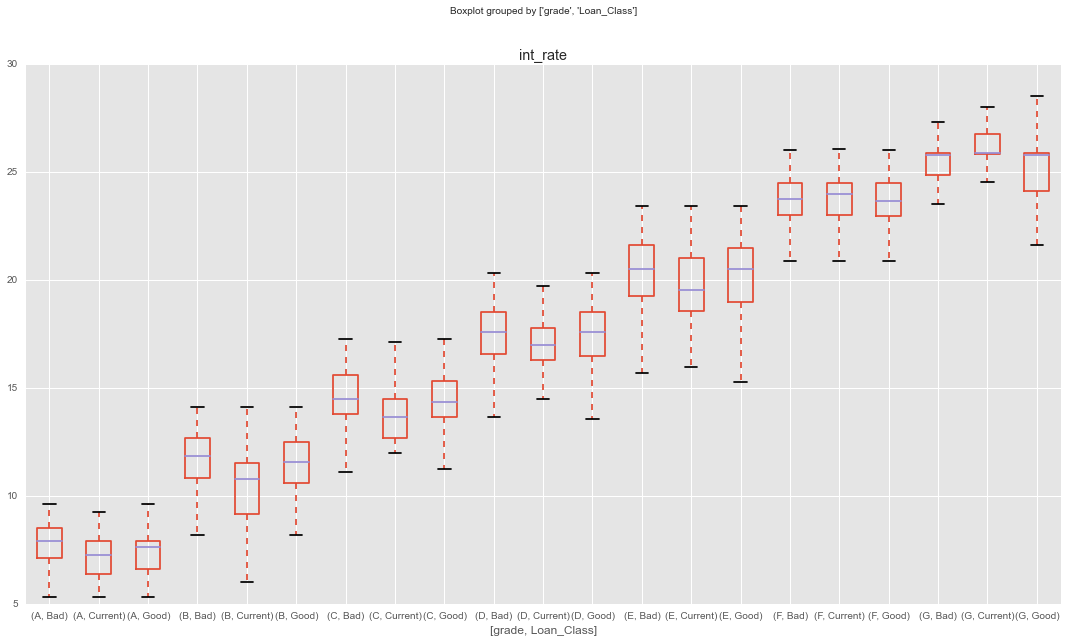

In [81]:
loan_df.boxplot(column='int_rate', by = ['grade','Loan_Class'], figsize=(18,10))

A further breakdown of the interest rate as compared to the grade and loan classification. A clear trend begins to appear that a better grade tends to lead to better interest rates. Those that were on time with their loans are also shown to get better rates, on average, than those that ended up with late payments or defaulting.

{'boxes': [<matplotlib.lines.Line2D at 0x601a4eb8>],
 'caps': [<matplotlib.lines.Line2D at 0x601b1dd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x601bbe80>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x601bb908>],
 'whiskers': [<matplotlib.lines.Line2D at 0x21525a20>,
  <matplotlib.lines.Line2D at 0x601b1860>]}

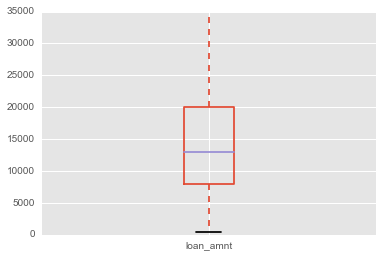

In [87]:
#Quick breakdown of loan amount
loan_df.boxplot(column='loan_amnt')

Above, we show the average breakdown for the amount of the loan. Based on the shape of the plot, we can tell that although the typical amount requested is around $13,000, there tend to be a larger count on the higher end fo the spectrum skewing the data. We will show below how the loan amounts are distributed among the various purposes for getting a loan, as well as the count for each of those purpose types. From the count we see that the main reasons most people took out loans from Lending Club were for credit cards or debt consolidation, with the combination of the two groups taking up over 85% of the purpose counts.

purpose
car                     8863
credit_card           206182
debt_consolidation    524215
educational              423
home_improvement       51829
house                   3707
major_purchase         17277
medical                 8540
moving                  5414
other                  42894
renewable_energy         575
small_business         10377
vacation                4736
wedding                 2347
Name: loan_amnt, dtype: int64

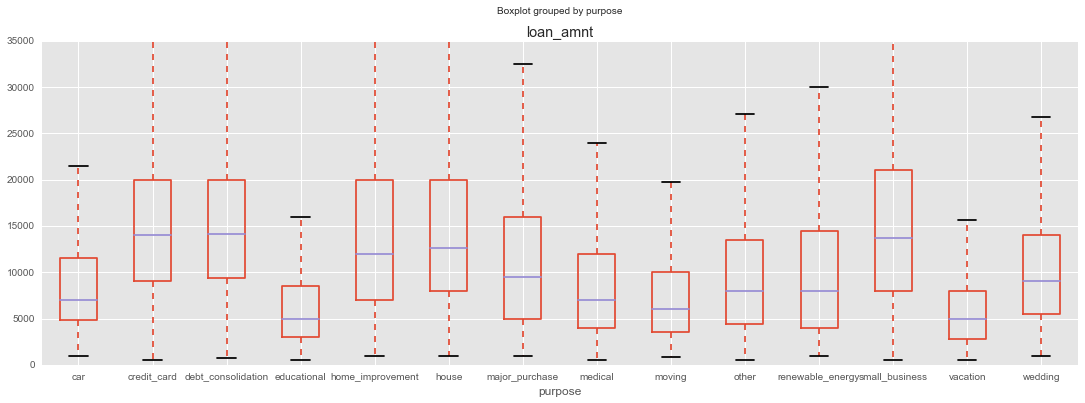

In [83]:
loan_df.boxplot(column='loan_amnt', by = 'purpose', figsize=(18,6))

purpose_df = loan_df.groupby(by="purpose")
purpose_df.loan_amnt.count()

The violin plots below show the loan amount vs loan class and employment duration (class). We note that there is not much difference between the loan amounts and the different classes of loan, but the Current loans seem to have a higher frequency of loans at specific loan amounts compared to the good and bad loans. There is also a larger peak at the upper range near 35,000 denoting there are a lot more loans out that are current at this higher loan amount than either good or bad.

There is, again, not a large difference in the violin plots when comparing the loan amount to employment duration. For those who have been employed for 10 years or more (all given a value of 10) we see a higher frequency of loans at the higher loan amounts like 25,000 and 35,000. They are most likely given these higher value loans because the bank feels they can trust them to pay more reliably due to the fact they have such a secure job.

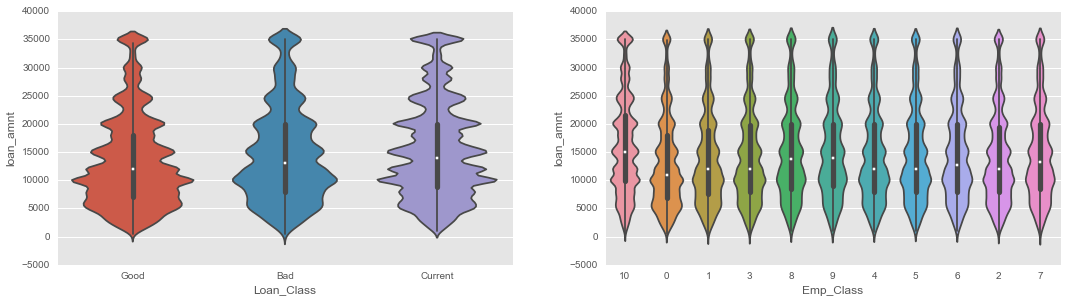

In [49]:
fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(2, 2, 1)
sns.violinplot(x="Loan_Class", y="loan_amnt", data=loan_df, size=6)
ax2 = fig.add_subplot(2, 2, 2)
sns.violinplot(x="Emp_Class", y="loan_amnt", data=loan_df, size=6)

As it can be seen below, there are some notable differences between both loan amount and interest rate when looking at home ownership. For loan amount, although those who rent, own, or have a mortgage seem to be fairly consistent and spread amongst all the loan values, the rent and own are much more bottom focused than those with a mortgage who seem to be more spread out along the loan amount scale and have the highest level of high value loans. The other, none, and any categories on the other hand are much less defined at specific loan amounts and are very bottom heavy denoting they are given much smaller loans, most likely due to their strange housing situation. They also have limited data counts compared to the mortgage, rent, and own groupings.

A similar trend can be seen in the interest rate between the home ownership values. The rent, own, and mortgage groups are all very similar with a much larger grouping near the bottom in the 5 to 10 percent range  than the other 3 groups, but a majority of their rates falling in the 10 to 15 percent range. The other, none, and any group are again lacking definition at specific interest rate values due to small counts of data.

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64


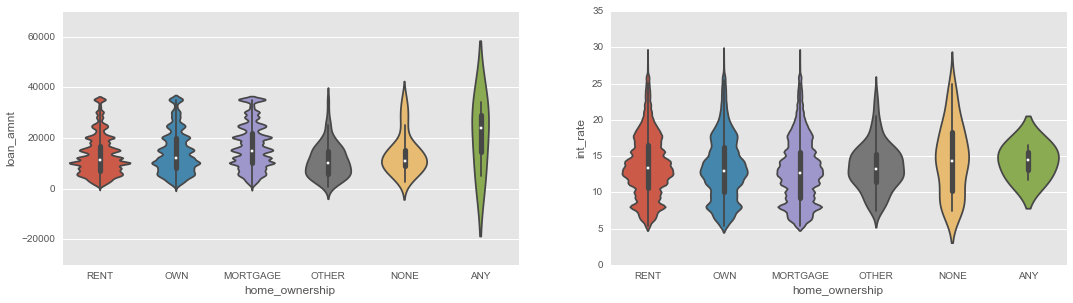

In [50]:
print loan_df.home_ownership.value_counts()

fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(2, 2, 1)

sns.violinplot(x="home_ownership", y="loan_amnt", data=loan_df, size=6)

ax2 = fig.add_subplot(2, 2, 2)
sns.violinplot(x="home_ownership", y="int_rate", data=loan_df, size=6)

The KDE plot below shows that the funded loan amounts are lower for the subjects where Verification is not done (either Source or normal verification) at higher values of loans. In the cases where either verification is done or source is verified the funded loan amounts tend to be higher. The shift from no verification to verification seems to occur at the 15,000 loan amount mark. This leads to a belief that if the loan is less than a specific amount, most likely 15,000, verification is not done in many circumstances, while after this value verification may be a requirement.

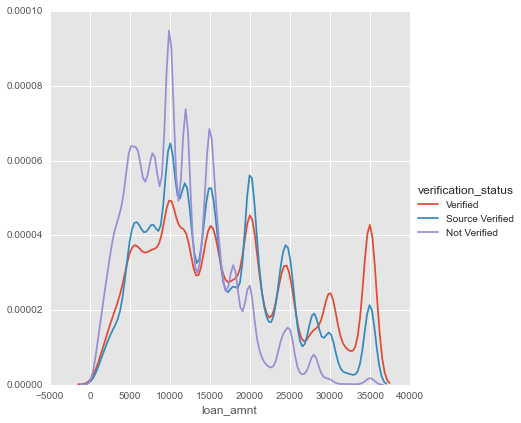

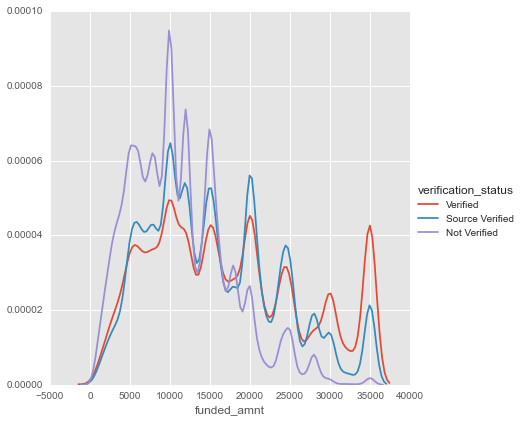

In [51]:
# Kdeplot creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(loan_df, hue="verification_status", size=6).map(sns.kdeplot, "loan_amnt").add_legend()
sns.FacetGrid(loan_df, hue="verification_status", size=6).map(sns.kdeplot, "funded_amnt").add_legend()

Another interesting aspect of the data set is not all people received the full amount of the loan that they requested. We can look at the differnce between the funded amount and the loan amount through the following scatter plot. It can quickly be observed that as people asked for more, they were not always successful at obtaining that amount. There are even ranges around 20,000 and 25,000 where the funded amount drops significantly. We also compare the means of the two amounts to discern if there is truly a major difference.

13.386980084


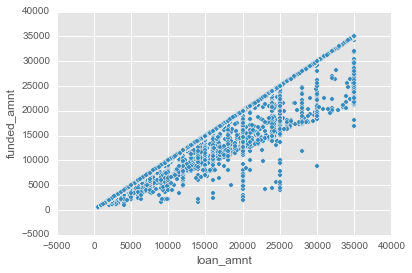

In [52]:
loan_df.plot(kind='scatter', x='loan_amnt', y='funded_amnt')

print loan_df.loan_amnt.mean() - loan_df.funded_amnt.mean()

For as many loans that did not get the fully funded amount, far more did recieve all or nearly all of the requested loan amount. The mean between the two values being only $13.39 different is idicative of a large portion of the loans getting the requested amount.

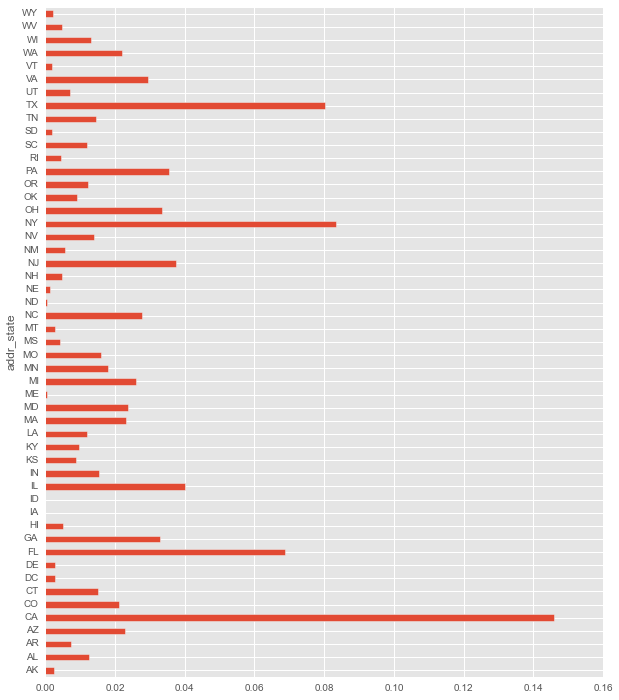

In [53]:
#Percent of people in each state
state_df = loan_df.groupby(by='addr_state')
state_percent = state_df.loan_amnt.count() / loan_df.loan_amnt.count()
state_percent.plot(kind='barh', figsize=(10,12), stacked=True)

The distribution of the loans taken out by state does lead to an interesting graph. We see that far more people take out loans in California, New York, Texas, and Florida than most of the other states. These end up being some of the largest and most populous states, but also some of the states with a much higher cost of living than others. This could prove to be a point of analysis in the future.

### Summarizing the Loans Over Time and seasonal effects
Checking the loans amount and frequency over time

0         Dec-16
1         Dec-16
2         Dec-16
3         Dec-16
4         Dec-16
5         Dec-16
6         Dec-16
7         Dec-16
8         Dec-16
9         Dec-16
10        Dec-16
11        Dec-16
12        Dec-16
13        Dec-16
14        Dec-16
15        Dec-16
16        Dec-16
17        Dec-16
18        Dec-16
19        Dec-16
20        Dec-16
21        Dec-16
22        Dec-16
23        Dec-16
24        Dec-16
25        Dec-16
26        Dec-16
27        Dec-16
28        Dec-16
29        Dec-16
           ...  
887349    Jan-16
887350    Jan-16
887351    Jan-16
887352    Jan-16
887353    Jan-16
887354    Jan-16
887355    Jan-16
887356    Jan-16
887357    Jan-16
887358    Jan-16
887359    Jan-16
887360    Jan-16
887361    Jan-16
887362    Jan-16
887363    Jan-16
887364    Jan-16
887365    Jan-16
887366    Jan-16
887367    Jan-16
887368    Jan-16
887369    Jan-16
887370    Jan-16
887371    Jan-16
887372    Jan-16
887373    Jan-16
887374    Jan-16
887375    Jan-16
887376    Jan-

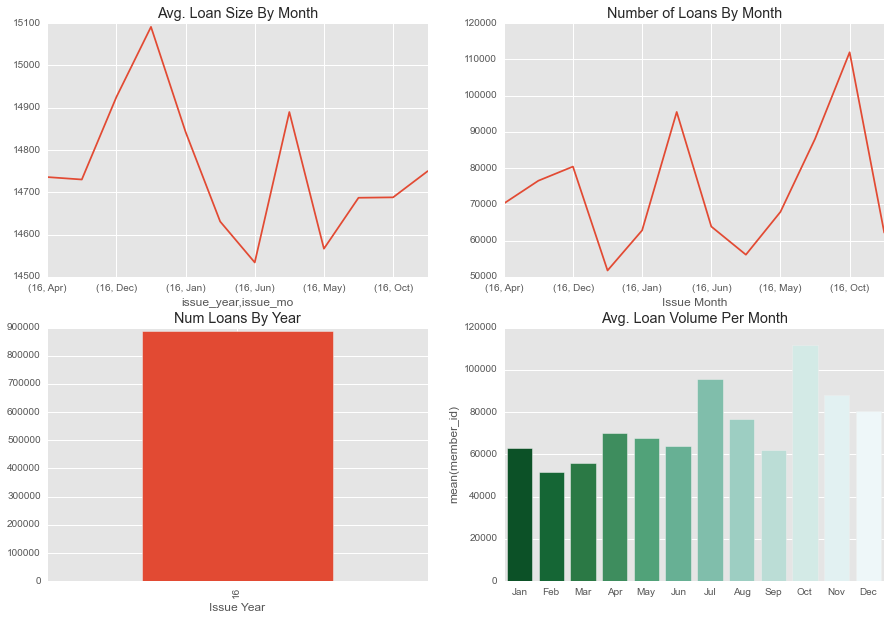

In [65]:
#summarize loans by month

import calendar
pd.options.mode.chained_assignment = None 

plt.style.use('ggplot')
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 2, 1)
#make new variable to groupby for month and year
loan_df['issue_mo'] = loan_df.issue_d.str[:3]
loan_df['issue_year'] = loan_df.issue_d.str[4:]

loan_by_month = loan_df.groupby(['issue_year','issue_mo'])

avgLoanSizeByMonth = loan_by_month['funded_amnt'].agg(np.mean).plot()
avgLoanSizeByMonth.set_title('Avg. Loan Size By Month')

ax2 = fig.add_subplot(2, 2, 2)
NumLoansPerMo = loan_by_month.member_id.agg(np.count_nonzero).plot()
NumLoansPerMo.set_title('Number of Loans By Month')
NumLoansPerMo.set_xlabel('Issue Month')

#less granular look at loan volume
ax3 = fig.add_subplot(2, 2, 3)
loanByYr = loan_df.groupby('issue_year')
loanYrPlt = loanByYr.member_id.agg(np.count_nonzero).plot(kind = 'bar')
loanYrPlt.set_title('Num Loans By Year')
loanYrPlt.set_xlabel('Issue Year')

ax4 = fig.add_subplot(2, 2, 4)
#get the counts by month
loanByMo = loan_df.groupby(['issue_d', 'issue_mo'])
numByDate = loanByMo.agg(np.count_nonzero).reset_index()

#average the monthly counts across years
counts_by_month = numByDate.groupby('issue_mo')
avg_loan_vol = counts_by_month.member_id.agg(np.mean)

moOrder = calendar.month_abbr[1:13]
mo_plt = sns.barplot(x = list(avg_loan_vol.index),y = avg_loan_vol, order = moOrder, palette = "BuGn_r")
mo_plt.set_title('Avg. Loan Volume Per Month')

##### From the seasonal trends of loans data, some key things can be noted.
1. The loan amount and frequency of loans have increased rapidly in the past few months
2. Average amount of loan is stable at arounf 16K per loan (mean value) in the last few years rising from low 7K in 2007
3. We can se that the number of loans that LC is giving overtime is increasing as we would expect with a company that is rapidly growing. I assume that such a rapid growth curve in the number of loans will be accompanied by a decrease in the overall quality of the loans.

Below are some additional details and summaries of the analysis with visuals about the loan data. As mentioned before, since the company is growing very fast, and amount of loan distributed is getting larger every month, there could be additional risk of bad loans and company might want to keep a close eye on potential defaulters to minimize the risk. Company might also want to keep a close eye on the number of loans issued by grade. By using the data for already defaulted or charged off loans, there is a possibility to predict and determine the potential hish risk members, and hence minimize the risk further.

In [25]:
from IPython.display import Image
import pandas as pd
Image(filename='Lending-club-loan_AnalysisSnapshot.jpg')

IOError: [Errno 2] No such file or directory: u'Lending-club-loan_AnalysisSnapshot.jpg'

In [ ]:
Image(filename='Loan_Status_Visual.jpg')

### Hypothesized Features

While the loan data had a lot of variables, the analysis would have been more interesting if the data contained some additional personal details about the borrower other than financial details.

It would have been interesting to see if factors such as gender, marital status and age correlated with any other loan variables. We would like to know the FICO score of the individuals that applied for the loans so see how it related to the grade they were given and the eventual status of the loan.

### Exceptional work:
#### Return on Investment Analysis (ROI)
For exceptional work, we did a ROI analysis on the data to see which loans were more profitable based on borrowers grade after accounting for defaults.

In [84]:
groupedGrade_df = loan_df.groupby(by="grade")

#Total payment grouped by grade
Payment=groupedGrade_df.total_pymnt.sum()

#Original loan amount grouped by grade
Loan=groupedGrade_df.loan_amnt.sum()

#Oustanding balance grouped by grade
outstanding=groupedGrade_df.out_prncp.sum()

#Return on investment is equal to ratio of:
#total payment received/original loan less outstanding principle
ROI=(Payment/(Loan-outstanding)-1)*100

#Average term period by grade and overall
Avgterm=groupedGrade_df.term.mean()
AvgtermTotal=loan_df.term.mean()

#Term weighted ROI. This puts all the payment on the same term
TWGT_ROI=((Payment/(Loan-outstanding)-1)/Avgterm)*AvgtermTotal

print'-----Unweighted ROI-----------'
print ROI
print'---------Average Term------------'
print AvgtermTotal
print'---------Term weighted ROI------------'
print TWGT_ROI

-----Unweighted ROI-----------
grade
A    10.554769
B    15.428469
C    21.355764
D    24.035280
E    27.506471
F    25.799974
G    24.111592
dtype: float64
---------Average Term------------
43.2010899514
---------Term weighted ROI------------
grade
A    0.123772
B    0.166591
C    0.208991
D    0.221820
E    0.225975
F    0.201374
G    0.182743
dtype: float64


### ROI
The above analysis shows grades D and E have the highest return on investment after accounting for defaults. Even though grade F and G loans had a higher interest rates, the loans also had a higher default rate which lowered the ROI.

Loans are usually repackaged into security tranches and sold to investor. This analysis would be of interest to such investors in determining the ROI